In [ ]:
import tensorflow

In [ ]:
import numpy as np

timesteps = 100  #总共100条训练数据
input_features = 32 #每条数据有32个参数
output_features = 64 #网络读取数据后输出含有64个参数的向量

inputs = np.random.random((timesteps, input_features))
state_t = np.zeros((output_features))  #先把状态参数初始化为0

W = np.random.random((input_features, output_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features,))

successive_outputs = []
for input_t in inputs:
    #处理输入数据
    output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
    #记录当前数据处理结果
    successive_outputs.append(output_t)
    #更新状态变量以便参与下次数据处理
    state_t = output_t
    
final_output_sequence = np.concatenate(successive_outputs, axis = 0)

In [7]:
import tensorflow as tf

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(10000, 32))
model.add(tf.keras.layers.SimpleRNN(32, return_sequences=True))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [9]:
max_features = 10000 # 常用的10000词
maxlen = 500 # 每条数据最长500
batch_size = 32

print("Loading data....")
(input_train, y_train), (input_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequence')
print(len(input_test), 'test sequence')
print(input_train.shape, 'train shape')

print('Pad sequences (samples x time)')
input_train = tf.keras.preprocessing.sequence.pad_sequences(input_train, maxlen = maxlen)
input_test = tf.keras.preprocessing.sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape: ', input_test.shape)

Loading data....
25000 train sequence
25000 test sequence
(25000,) train shape
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape:  (25000, 500)


In [10]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(max_features, 32))
model.add(tf.keras.layers.SimpleRNN(32))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train, epochs = 10, batch_size = 128, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 29s 1ms/sample - loss: 0.5771 - acc: 0.6916 - val_loss: 0.4137 - val_acc: 0.8236
Epoch 2/10
20000/20000 [==============================] - 26s 1ms/sample - loss: 0.3664 - acc: 0.8456 - val_loss: 0.3665 - val_acc: 0.8424
Epoch 3/10
20000/20000 [==============================] - 26s 1ms/sample - loss: 0.2653 - acc: 0.8958 - val_loss: 0.3450 - val_acc: 0.8596
Epoch 4/10
20000/20000 [==============================] - 26s 1ms/sample - loss: 0.2011 - acc: 0.9244 - val_loss: 0.3477 - val_acc: 0.8596
Epoch 5/10
20000/20000 [==============================] - 26s 1ms/sample - loss: 0.1440 - acc: 0.9493 - val_loss: 0.4305 - val_acc: 0.8346
Epoch 6/10
20000/20000 [==============================] - 26s 1ms/sample - loss: 0.0942 - acc: 0.9682 - val_loss: 0.4224 - val_acc: 0.8568
Epoch 7/10
20000/20000 [==============================] - 26s 1ms/sample - loss: 0.0622 - acc: 0.9805 - val_loss: 0.6

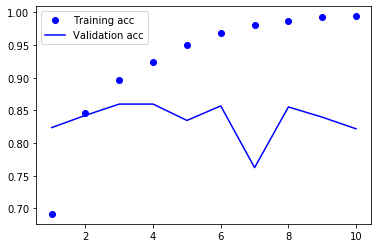

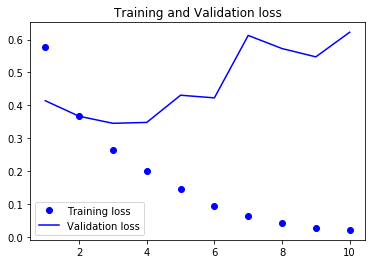

In [11]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()